# Importing required liberaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ipywidgets import interact
import time 

In [2]:
!unzip '/home/kanishk/Downloads/NN_spine.zip'

Archive:  /home/kanishk/Downloads/NN_spine.zip
   creating: NN_spine/
   creating: NN_spine/.ipynb_checkpoints/
  inflating: NN_spine/.ipynb_checkpoints/Nearest_neighbor_spine-checkpoint.ipynb  
  inflating: NN_spine/.ipynb_checkpoints/NN_spine_solution-checkpoint.ipynb  
  inflating: NN_spine/.nbgrader.log  
  inflating: NN_spine/column_3C.dat  
  inflating: NN_spine/confusion_matrix.png  
  inflating: NN_spine/Nearest_neighbor_spine.ipynb  


In [3]:
labels = [b'NO', b'DH', b'SL']
data=np.loadtxt('/home/kanishk/NN_spine/column_3C.dat',converters={6:lambda x: labels.index(x)})

Splitting Dataset into Training and Testing dataset

In [4]:
split=np.random.rand((len(data)))<0.80
trainx=data[split][:,:-1]
trainy=data[split][:,-1]
testx=data[~split][:,:-1]
testy=data[~split][:,-1]

# Implementation using different distance functions

In [5]:
def NN(trainx,trainy,testx,dist='L2'):
    
    def dist_L1(x):
        distance=[sum(np.abs(value-x)) for value in trainx]
        return trainy[np.argmin(distance)]
    
    def dist_L2(x):
        distance=[sum(np.square(value-x)) for value in trainx]
        return trainy[np.argmin(distance)]
    
    if dist=='L1':
        return np.array([int(dist_L1(x)) for x in testx])
    if dist=='L2':
        return np.array([int(dist_L2(x)) for x in testx])
    else:
        raise ValueError('Value {0} not defined'.format(dist))
    

In [6]:
y_L1=NN(trainx,trainy,testx,'L1')
y_L2=NN(trainx,trainy,testx,'L2')

# Test errors

In [25]:
def confusion_matix(pred,true):
    mat=np.zeros((3,3))
    for i in range(len(true)):
            mat[int(true[i]),int(pred[i])]+=1
    return mat

def error(pred,true):
    return np.not_equal(pred,true).sum()/len(true)
label=['NO','DH','SL']

For L1 distance

Error using L1 distance: 0.12903225806451613
Confusion matrix for L1:

 [[17.  5.  1.]
 [ 2.  9.  0.]
 [ 0.  0. 28.]]


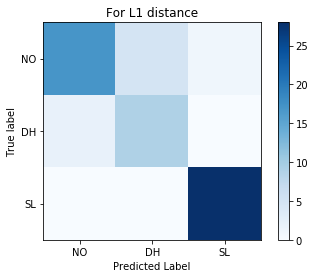

In [26]:
print('Error using L1 distance: '+str(error(y_L1,testy)))
print('Confusion matrix for L1:\n\n '+str(confusion_matix(y_L1,testy)))
plt.imshow(confusion_matix(y_L1,testy),plt.cm.Blues)
plt.colorbar()
plt.title('For L1 distance')
plt.xlabel('Predicted Label')
plt.ylabel('True label')
plt.xticks([0,1,2],label)
plt.yticks([0,1,2],label)
plt.show()

For L2 distance

Error using L2 distance: 0.12903225806451613
Confusion matrix for L2:

 [[16.  5.  2.]
 [ 1. 10.  0.]
 [ 0.  0. 28.]]


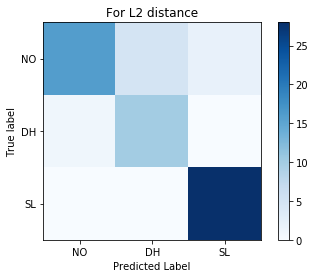

In [27]:
print('Error using L2 distance: '+str(error(y_L2,testy)))
print('Confusion matrix for L2:\n\n '+str(confusion_matix(y_L2,testy)))
plt.imshow(confusion_matix(y_L2,testy),plt.cm.Blues)
plt.colorbar()
plt.title('For L2 distance')
plt.xlabel('Predicted Label')
plt.ylabel('True label')
plt.xticks([0,1,2],label)
plt.yticks([0,1,2],label)
plt.show()